In [25]:
# Tabela povprečne ocene, glede na število epizod.
import csv
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

encoding = 'utf-8'
with open(file="anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    # podatki = {
    #     12: [8.6, 7.3, 5.1, 8.8]
    #     22: [9.9, 6.6]
    # }
    podatki = {}
    podatki_average = {}
    anime_count = {}

    for i, line in enumerate(reader):
        if i == 0:
            continue
        
        ocena = line[1]
        stevilo_ep = line[6]

        if stevilo_ep == '':
            continue

        if stevilo_ep not in podatki.keys():
            podatki[stevilo_ep] = [ocena]
        else:
            podatki[stevilo_ep].append(ocena)

    for key in podatki.keys():
        ocene = podatki[key] # ['9.6', ...]
        ocene_float = [float(o) for o in ocene] # Spremenimo iz string to float
        podatki_average[key] = round(sum(ocene_float) / len(ocene_float), 2)
        anime_count[key] = len(ocene_float)

# Draw table:
podatki_average = {k: v for k, v in sorted(podatki_average.items(), key=lambda item: int(item[0]))}

list_podatki_average = list(podatki_average.items()) # Damo v to obliko: [(1, 1), (2, 3), (1, 9), ...]
for i, key in enumerate(podatki_average.keys()):
    list_podatki_average[i] = list_podatki_average[i] + (anime_count[key], ) # Dodamo count:  [(1, 1, 1), (2, 3, 2), (1, 9, 5), ...]

table = pd.DataFrame(list_podatki_average, columns=["Število epizod", "Povprečna ocena", "Št. animejev"])
display(
    table.head(25)
         .style
         .hide(axis="index") # Skrije vrstico ki oštevilči tableo.
         .format({"Povprečna ocena": "{:.2f}"})
)


Število epizod,Povprečna ocena,Št. animejev
1,8.94,7
2,8.86,1
7,8.86,1
10,9.05,1
12,8.98,1
13,8.98,4
14,8.88,1
22,8.90,1
24,8.94,4
25,8.91,1


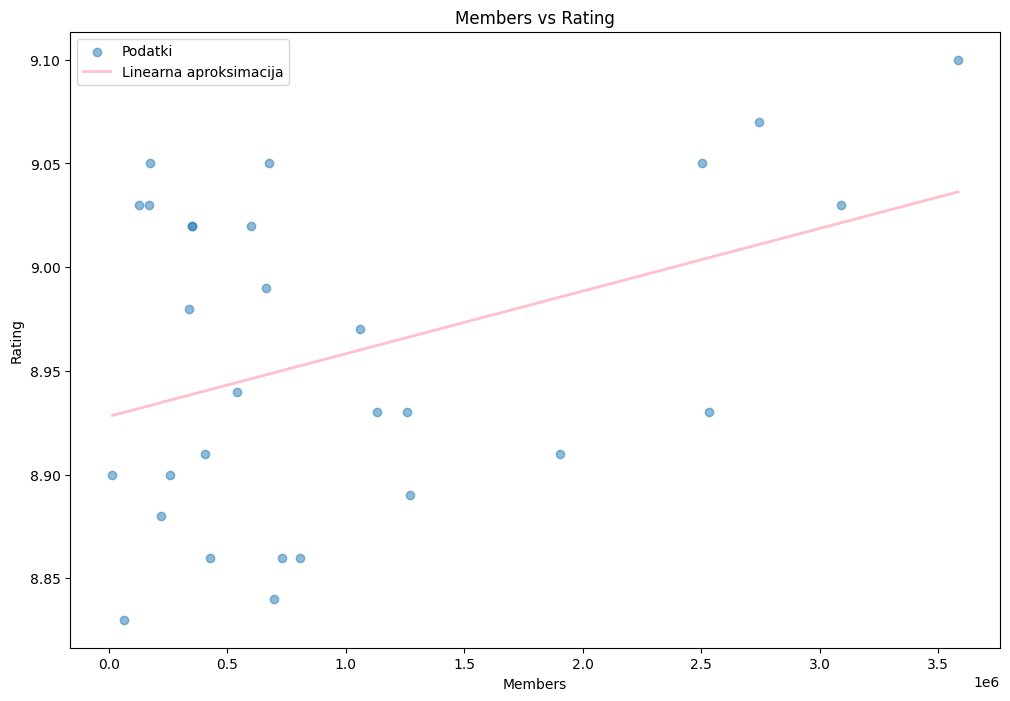

In [26]:
import csv
import matplotlib.pyplot as plt
import numpy as np

encoding = 'utf-8'

members = []
scores = []

with open("anime_data_premium.csv", "r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue 
        try:
            score = float(line[1])
            n_members = int(line[21].replace(",", ""))
        except ValueError:
            continue
        members.append(n_members)
        scores.append(score)

members = np.array(members) #Spremenimo iz navadnega arraya v numpy array
scores = np.array(scores)

plt.figure(figsize=(12, 8)) #Naredi "platno"
plt.scatter(members, scores, alpha=0.5, label="Podatki") #Alfa pove, kok prosojne so pikice, scatter pa naredi pikice


#RISANJE LINEARNE APROKSIMACIJE
a, b = np.polyfit(members, scores, 1) #Najde polinom stopnje 1, ki se najbolj prilega
x_fit = np.linspace(members.min(), members.max(), 2) #Da 500 mest na to os 
y_fit = a * x_fit + b
plt.plot(x_fit, y_fit, color="pink", linewidth=2, label="Linearna aproksimacija")

#Risanje grafa
plt.xlabel("Members")
plt.ylabel("Rating")
plt.title("Members vs Rating")
plt.legend()

plt.show()


Hipoteza je bila potjena. Ugotovili smo, da imajo anime-ji z boljšo oceno več gledalcev.

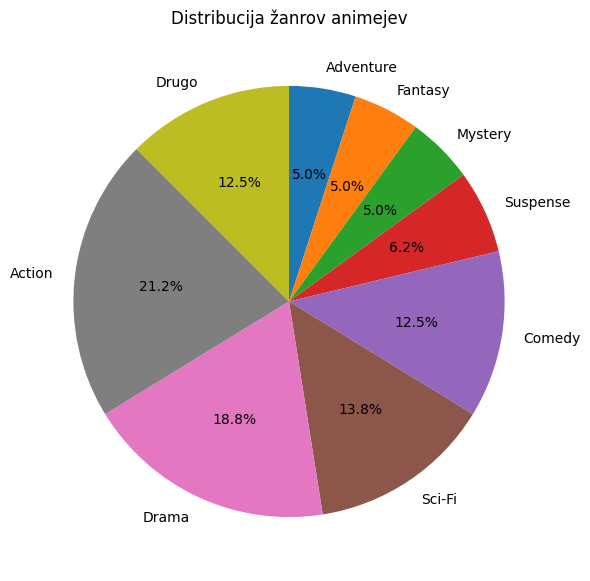

In [27]:
import csv
import matplotlib.pyplot as plt

encoding = "utf-8"

zanra_stevilo = {}

with open("anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue  # skip header row

        # take the genre column (adjust index if needed!)
        genres = line[16]   # e.g. "Action, Drama, Suspense"
        genres = genres.strip("[]")


        # split into individual genres
        for g in genres.split(", "):
            if g.strip() == "" or g == "N/A":
                continue

            g = g.strip("'") # Da bo lepo :)

            if g not in zanra_stevilo.keys():
                zanra_stevilo[g] = 1
            else:
                zanra_stevilo[g] += 1

# Razvrsti po vrednosti (naraščajoče)
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
zanra_stevilo = {k: v for k, v in sorted(zanra_stevilo.items(), key=lambda item: item[1])}
meja = 4  # prag v %

labels = []
vrednosti = []

sum_vrednosti = sum(zanra_stevilo.values())
others_vrednost = 0

for label, value in zanra_stevilo.items():
    procent = 100 * value / sum_vrednosti
    if procent >= meja:
        labels.append(label)
        vrednosti.append(value)
    else:
        others_vrednost += value

# Dodaj "Others" samo, če je potrebno
if others_vrednost > 0:
    labels.append("Drugo")
    vrednosti.append(others_vrednost)


# Risanje pite
plt.figure(figsize=(7,7)) # Popravimo velikost torte
plt.pie(
    vrednosti,
    labels=labels,
    autopct="%1.1f%%", # TODO: Razišči
    startangle=90,
    counterclock=False
)
plt.title("Distribucija žanrov animejev")
plt.show()



Vidimo, da je žanra action(slo. akcija) najbolj popularna.
Sledijo si:
- Action
- Drama
- Adventure
- Supernatural
- Fantasy

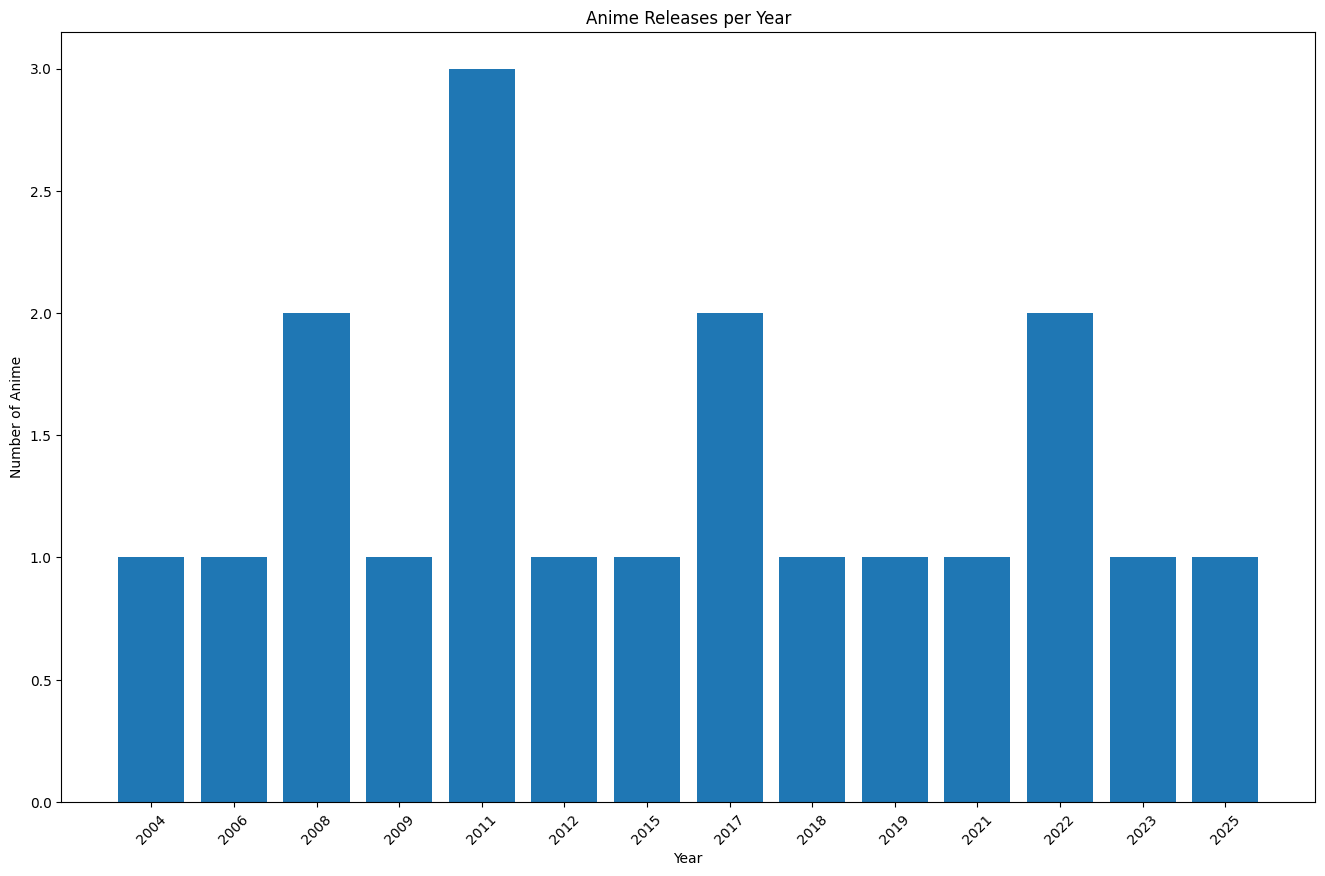

In [28]:
# Anime po letih
import re
import csv

encoding = 'utf-8'

with open(file="anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    leta = {}
    for i, line in enumerate(reader):
        if i == 0:
            continue # Spusti prvo vrstico.
        
        podatek = line[10]
        leto = re.search(r"\b(\d{4})\b", podatek)
        if leto:
            leto = leto.group(1)

        if leto == 'N/A' or leto == None:
            continue

        if leto not in leta.keys():
            leta[leto] = 1
        else:
            leta[leto] += 1
            
# Razporedimo leta naraščajoče
years = sorted(leta.keys(), key=int)
counts = [leta[y] for y in years]

plt.figure(figsize=(16.18, 10))
plt.bar(years, counts)
plt.xlabel("Year")
plt.ylabel("Number of Anime")
plt.title("Anime Releases per Year")
plt.xticks(rotation=45)  # Da se ne prekrivajo
plt.show()

In [ ]:
# Demografika z besedami

import csv
encoding = 'utf-8'

with open(file="anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    demografike = {}
    for i, line in enumerate(reader):
        if i == 0:
            continue # Spusti prvo vrstico.
        
        demografika = line[17]
        if demografika == 'N/A' or demografika == None:
            continue

        if demografika not in demografike.keys():
            demografike[demografika] = 1
        else:
            demografike[demografika] += 1



print(demografike)
#print(f"Najbolj ciljna demografika je: {}")

{'24 min. per ep.': 13, '23 min. per ep.': 4, '1 hr. 44 min.': 1, '1 hr. 41 min.': 1, '24 min.': 1, '26 min. per ep.': 1, '2 hr. 10 min.': 1, 'PG-13 - Teens 13 or older': 1, '1 hr. 50 min.': 1, '22 min. per ep.': 2, '1 hr. 12 min. per ep.': 1, '2 hr. 20 min.': 1, '2 hr. 24 min.': 1}


In [30]:
# Najbolj popularen studio
import csv

encoding = 'utf-8'

dic_studiji = {}

with open("anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue  # skip header

        members = n_members = int(line[21].replace(",", ""))
        studios = line[14].split(",")  # adjust index for your dataset

        if members == 'N/A' or members == '':
            continue

        members = int(members)

        for studio in studios:
            studio = studio.strip()
            if not studio or studio == "N/A":
                continue
            dic_studiji[studio] = dic_studiji.get(studio, 0) + members

# Najdi največ memberjev
max = 0
popularni_sudio = ""
for key in dic_studiji.keys():
    if max < dic_studiji[key]:
        max = dic_studiji[key]
        popularni_sudio = key

print(f"Najbolj popularni studio je: {popularni_sudio} z {max} člani.")


Najbolj popularni studio je: Kyoto Animation z 4487767 člani.


In [31]:
# Neki za v tabelco
# Leto | Oglede
# 2000 | 20M
# 2024 | 10M

# Kok animejev se ni finishalo and aira trenutno znotraj najnih podatkov,









# Povprečno oceno vseh animejov znotaj podatkov. 8.6
#      | winter | spring | summer | fall |
# 2025 | 
# 2024 |
# 2023 |


# Najbolj ocenjen stuido
# Najbolj produktiven studio (st epizod.)
# Št animejev vsak letni čas
# Izberi stuido, vrne list animejov

# Kaj hočeš gledati. (vpiši žanere) -> po oceni